In [122]:
import pandas as pd 


In [123]:
dataframe=pd.read_csv("bisiklet.csv")

In [124]:
dataframe.head()  # eğitimde bu dosyayı bulamadım -bende gemini den üretmesini istesim üretilen veride fiyat en başta olması gerekirken
#bende en sondaydı bunu düzeltemlim

,ozellik1,ozellik2,fiyat
0,1752.114587,1758.451236,954.8745
1,1755.987412,1751.235478,1205.4578
2,1750.145874,1759.854712,850.1245
3,1758.951235,1753.658741,1457.9854
4,1754.785412,1750.124578,987.4512


In [125]:
fiyat=dataframe["fiyat"] #fiyat kolonunu aldık 

In [126]:
fiyat

0      954.8745
1     1205.4578
2      850.1245
3     1457.9854
4      987.4512
        ...    
91     915.7741
92    1245.9985
93     842.1124
94    1475.5587
95     780.8899
Name: fiyat, Length: 96, dtype: float64

In [127]:
dataframe.drop("fiyat",axis=1,inplace=True ) # fiyat kolonunu sildik en sondan 

In [128]:
dataframe

,ozellik1,ozellik2
0,1752.114587,1758.451236
1,1755.987412,1751.235478
2,1750.145874,1759.854712
3,1758.951235,1753.658741
4,1754.785412,1750.124578
...,...,...
91,1756.552147,1753.220145
92,1751.336985,1757.889541
93,1758.112458,1750.445587
94,1754.998541,1755.111245


In [129]:
dataframe =pd.concat([fiyat,dataframe],axis=1) # fiyat kolonunu başa ekledik 

In [130]:
dataframe

,fiyat,ozellik1,ozellik2
0,954.8745,1752.114587,1758.451236
1,1205.4578,1755.987412,1751.235478
2,850.1245,1750.145874,1759.854712
3,1457.9854,1758.951235,1753.658741
4,987.4512,1754.785412,1750.124578
...,...,...,...
91,915.7741,1756.552147,1753.220145
92,1245.9985,1751.336985,1757.889541
93,842.1124,1758.112458,1750.445587
94,1475.5587,1754.998541,1755.111245


##### seaborn kütüphanesi ile  görselleştirme işlemleri 

In [131]:
import seaborn as sbn
import matplotlib.pyplot as plt

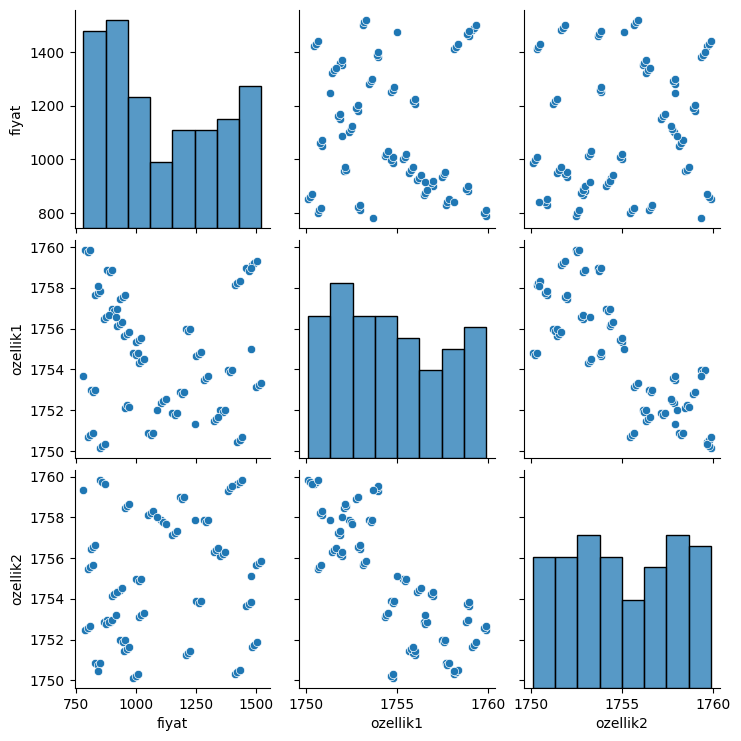

In [132]:
sbn.pairplot(dataframe)

### veriyi test/train olarak ikiye ayırma (istenen parça büyüklüğünde örn :  0.3 0.7 gibi)

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
### bizden diziler ister bu metod   

### train_test_split    y=wx + b formülünü unutmamalıyız 
y= label=ulaşılmak istenen sonuç
x=feature=özellik 

In [135]:

y=dataframe["fiyat"].values # .values ile numpy dizisi olarak aldık
x=dataframe[["ozellik1","ozellik2"]].values  #eğer .values olmasaydı dataframe 

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)





##### kaç tane veri olduğuna bakalım  .shape ile 

In [137]:
x_train.shape 

(64, 2)

In [138]:
x_test.shape

(32, 2)

In [139]:
y_train.shape

(64,)

In [140]:
y_test.shape

(32,)


## veri normalizasyonu
#### scaling 

In [141]:
 #  veri değerlerini 0 1 arasına alma işlemleri 

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler =MinMaxScaler()

In [144]:
scaler.fit(x_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [145]:
x_train=scaler.transform(x_train)

In [146]:
x_test=scaler.transform(x_test)

In [147]:
x_train  #veriler arasına getirildi

array([[0.79280029, 0.07704145],
       [0.89721069, 0.29410572],
       [0.98972107, 0.24997712],
       [0.3267368 , 0.58907612],
       [0.89481806, 0.37334109],
       [0.66936615, 0.28250339],
       [0.84068335, 0.04077187],
       [0.4988023 , 0.51228513],
       [0.36178888, 0.94590906],
       [0.6248258 , 0.44142265],
       [0.05263029, 1.        ],
       [0.16740658, 0.72938988],
       [0.18929443, 0.61638582],
       [0.47689492, 0.02054619],
       [0.17768551, 0.73966298],
       [0.28047482, 0.91049153],
       [0.47415342, 0.37496126],
       [0.        , 0.9995861 ],
       [0.13486174, 0.63661149],
       [0.47689492, 0.        ],
       [0.2384712 , 0.78379055],
       [0.65849639, 0.3180106 ],
       [0.58722166, 0.15751914],
       [0.88693176, 0.28383262],
       [0.28047482, 0.91049153],
       [0.44976327, 0.3287391 ],
       [0.24875013, 0.77351746],
       [0.06461727, 0.83212085],
       [0.7030314 , 0.41092388],
       [0.78252136, 0.06676835],
       [0.

#### tensorflow kullanımı 

In [148]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #model için 
from tensorflow.keras.layers import Dense  #katmanlar için 

In [149]:

model=Sequential()

In [150]:
model.add(Dense(4,activation="relu")) #katmanların eklenmesi 4 nöronlu 
model.add(Dense(10,activation="relu"))
model.add(Dense(3,activation="relu"))

#3 katman

In [151]:
model.add(Dense(1))  #çıktı katmanı 

In [152]:
model.compile(optimizer ="adam",loss="mse") #modeli oluşturur / optimizer "adam" daha iyi çalışan bir yöntem olabilir 

#### Train etme işlemeleri

In [153]:
### eğer veri sayısı çok fazla ise tek seferde verilerin hepisni vermek yerine parça parça vermek gerekebilir   batch_size

In [154]:
model.fit(x_train,y_train,epochs=250, batch_size=2 )


Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1232144.0000
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1231876.7500
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1231642.6250
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1231346.7500
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1230910.0000
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1230294.3750
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1229409.6250
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1228138.5000
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1226310.1250
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1223731.1250
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1220174.8750
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1215417.2500
Epoch 13/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1209180.3750
Epoch 14/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

In [155]:
loss=model.history.history["loss"]

In [156]:
#çizdirelim 

<Axes: >

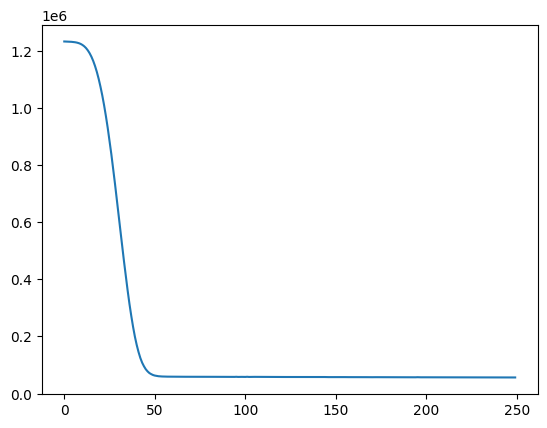

In [157]:
sbn.lineplot( x=range(len(loss)),y=loss )

In [158]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)

In [159]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [160]:
trainLoss

56087.0390625

In [161]:
testLoss

56629.0625

#### model değerlendirilmesi 

In [162]:
#x_test  ve  y_test ile bir soru cevap datamız var
#  eğer sistemi x test ile eğitip y leri tahmin ettirirsek 
# ve y_test ler de zaten olması gereken edğerler
# tahmin edilen ile olması gereken i karşılaştırıp doğruluğu değerlendirebiliriz . 

In [163]:
testTahminleri=model.predict(x_test) # x test e göre eğitilecek ve sonuçta y değerlerini bulacak 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [164]:
testTahminleri  # bir dizi formunda 


array([[ 991.5129 ],
       [1126.3302 ],
       [1216.8475 ],
       [1145.7614 ],
       [1090.4791 ],
       [1095.0609 ],
       [1033.3695 ],
       [1163.9316 ],
       [1133.729  ],
       [1172.5112 ],
       [1291.9913 ],
       [1059.7904 ],
       [1182.4832 ],
       [ 974.4716 ],
       [1117.5573 ],
       [1057.4061 ],
       [ 956.16864],
       [ 997.61566],
       [1116.959  ],
       [1206.1577 ],
       [1106.8652 ],
       [ 984.2042 ],
       [1104.7933 ],
       [1098.2081 ],
       [1094.1035 ],
       [1080.906  ],
       [1155.4938 ],
       [1291.034  ],
       [1199.2367 ],
       [1214.6182 ],
       [1039.1655 ],
       [ 953.79614]], dtype=float32)

In [165]:
tahminDf=pd.DataFrame(y_test,columns=["Gerçek Y değerleri"])

In [166]:
tahminDf

,Gerçek Y değerleri
0,1410.3214
1,1500.3214
2,1477.9854
3,909.9987
4,1050.4578
5,820.9874
6,1360.1245
7,1430.6587
8,1085.3365
9,960.8745


In [167]:
testTahminleri=pd.Series(testTahminleri.reshape(32,)) ##serie stline çevirdik 

In [168]:
tahminDf=pd.concat([tahminDf,testTahminleri] , axis=1) ##tahmin ve gerçek değerleri birleştirerek  
# tahmin ve gerçek değerlerden oluşan bir tablo oluşturduk 

In [169]:
tahminDf

,Gerçek Y değerleri,0
0,1410.3214,991.512878
1,1500.3214,1126.330200
2,1477.9854,1216.847534
3,909.9987,1145.761353
4,1050.4578,1090.479126
5,820.9874,1095.060913
6,1360.1245,1033.369507
7,1430.6587,1163.931641
8,1085.3365,1133.729004
9,960.8745,1172.511230


In [170]:
tahminDf.columns=["Gerçek Y" , "Tahmin Y"]  #stun isimlerini değiştirdik 

In [171]:
tahminDf

,Gerçek Y,Tahmin Y
0,1410.3214,991.512878
1,1500.3214,1126.330200
2,1477.9854,1216.847534
3,909.9987,1145.761353
4,1050.4578,1090.479126
5,820.9874,1095.060913
6,1360.1245,1033.369507
7,1430.6587,1163.931641
8,1085.3365,1133.729004
9,960.8745,1172.511230


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

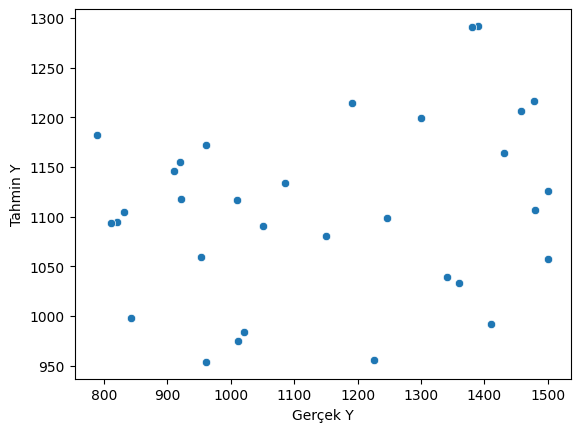

In [172]:
# çizdirelim 
sbn.scatterplot( x = "Gerçek Y",y = "Tahmin Y", data=tahminDf)

In [173]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [174]:
mean_absolute_error(tahminDf[ "Gerçek Y"],tahminDf["Tahmin Y"]) # hata oranı 

201.79237066040037

In [175]:
mean_squared_error(tahminDf[ "Gerçek Y"],tahminDf["Tahmin Y"]) # hata oranı 

56629.07031909378

### describe

In [176]:
# ilk datamızın özelliklerine bakalım 
dataframe.describe()  #datamızın özelliklerini verir 

,fiyat,ozellik1,ozellik2
count,96.000000,96.000000,96.000000
mean,1107.460159,1754.655027,1755.006145
std,232.233145,2.823902,2.968115
min,780.889900,1750.145874,1750.124578
25%,907.712550,1752.131087,1752.632896
50%,1040.655950,1754.590099,1754.937451
75%,1323.957800,1756.910412,1757.794415
max,1520.000000,1759.874512,1759.858741
